# Eda_WomenDressesReviews

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Project\Women Dresses Reviews Dataset .csv")
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [3]:
print(df.shape)
print(df.duplicated().sum())

tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(tabela)

(23486, 11)
0


,Unique,Null,NullPercent,Type
s.no,23486,0,0.000000,int64
age,77,0,0.000000,int64
division_name,3,14,0.000596,object
department_name,6,14,0.000596,object
class_name,20,14,0.000596,object
clothing_id,1206,0,0.000000,int64
title,13993,3810,0.162224,object
review_text,22634,845,0.035979,object
alike_feedback_count,82,0,0.000000,int64
rating,5,0,0.000000,int64


In [4]:
df.dropna(inplace=True)
df.drop('s.no',axis=1,inplace=True)
print('ok')

ok


# Graphic
## what is biggest upvote in a comment

In [5]:
df['alike_feedback_count'].max()

122

In [6]:
df[df['alike_feedback_count'] == 122]

,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
3329,34,General,Dresses,Dresses,1092,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,122,3,1


# Division Quantity

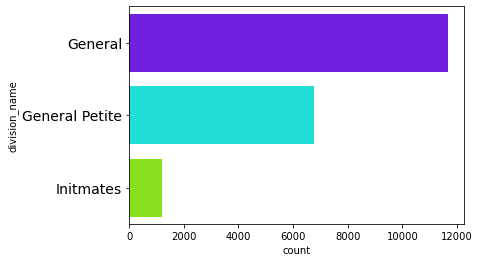

In [7]:
sns.countplot(y=df['division_name'], order=df['division_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=14)
plt.show()

# Department Quantity

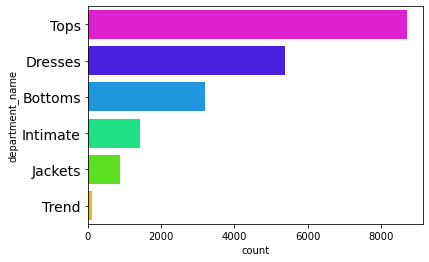

In [8]:
sns.countplot(y=df['department_name'], order=df['department_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=14)
plt.show()

# Product Quantity

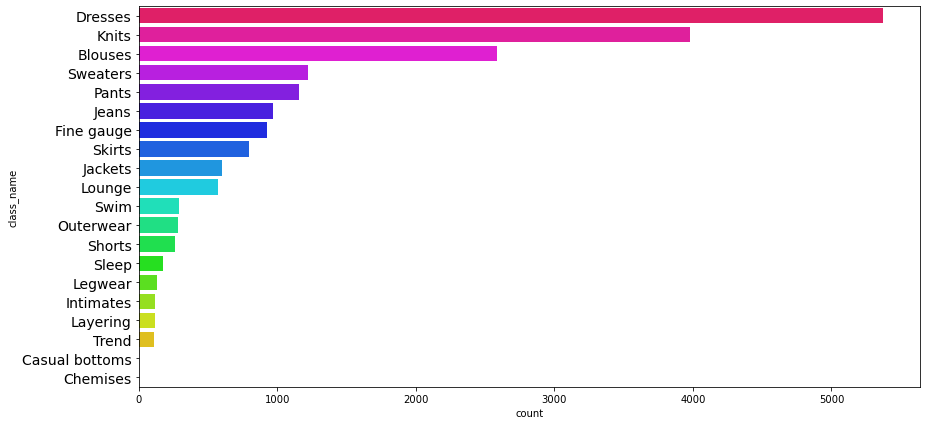

In [9]:
plt.figure(figsize=(14,7))
sns.countplot(y=df['class_name'], order=df['class_name'].value_counts().index,palette='hsv_r')
plt.yticks(fontsize=14)
plt.show()

# Classification by department

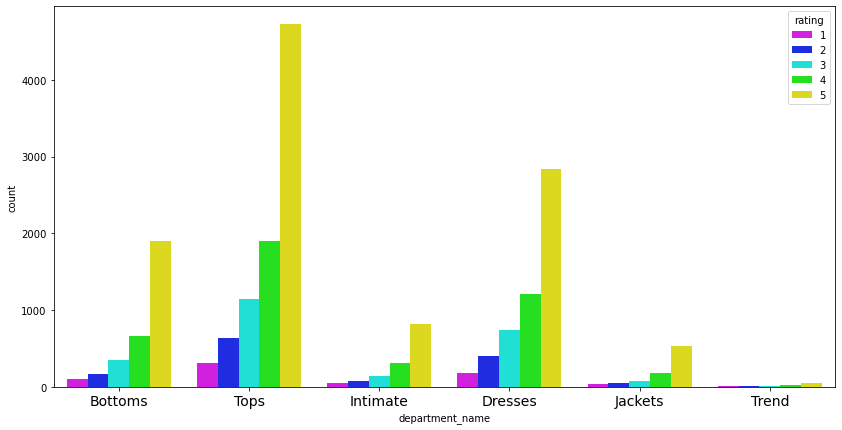

In [10]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['department_name'], hue=df['rating'], palette='hsv_r')
plt.xticks(fontsize=14)
plt.show()

# Recommendation by deopartment

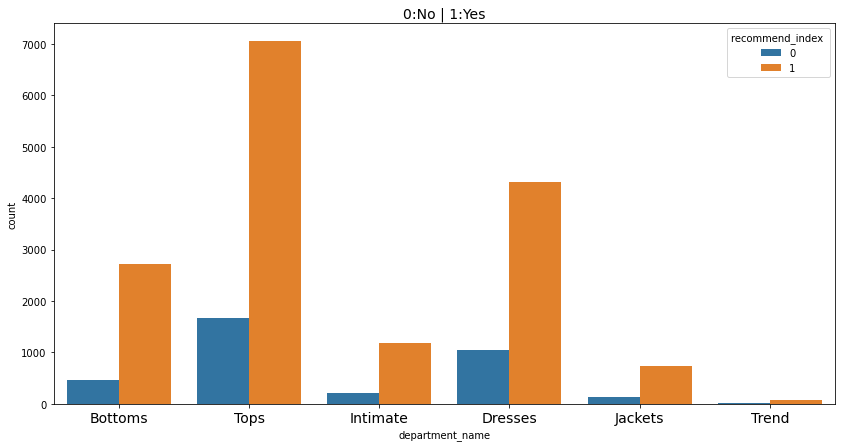

In [11]:
# how many department were recommended as optimal
plt.figure(figsize=(14,7))
sns.countplot(x=df['department_name'], hue=df['recommend_index '])
plt.title('0:No | 1:Yes', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Classification by product type

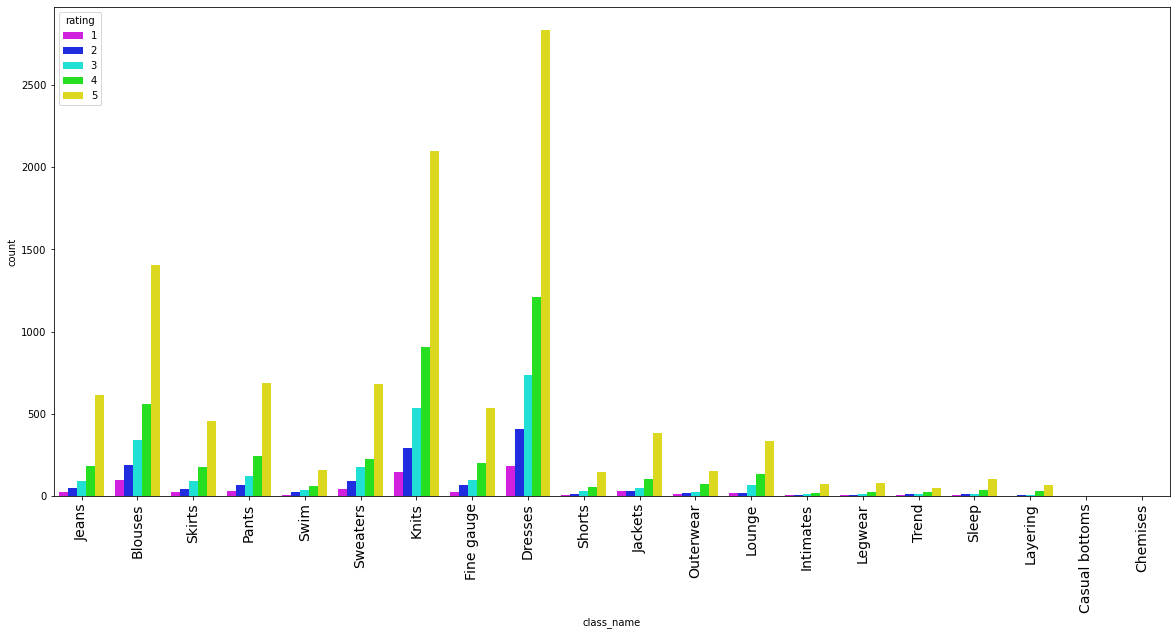

In [12]:
plt.figure(figsize=(20,9))
sns.countplot(x=df['class_name'], hue=df['rating'], palette='hsv_r')
plt.xticks(rotation=90, fontsize=14)
plt.show()

# Recommendation by product type

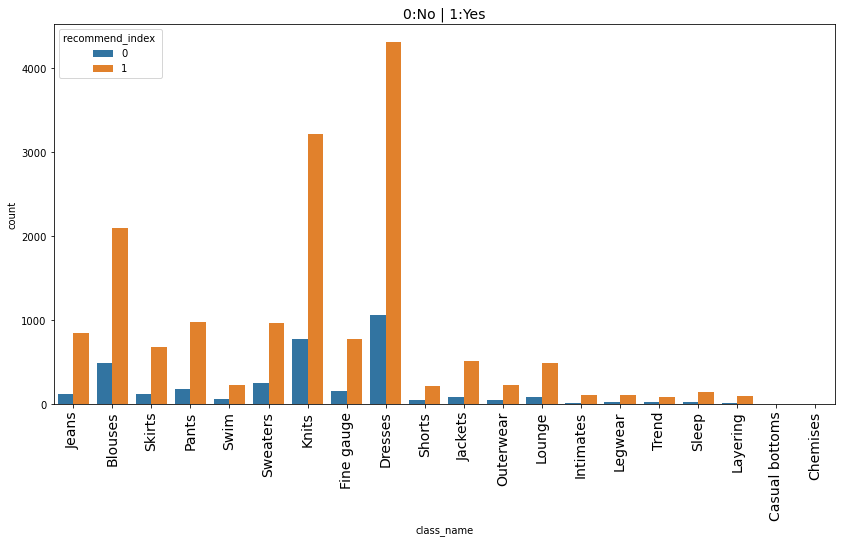

In [13]:
# how many department were recommended as excellent
plt.figure(figsize=(14,7))
sns.countplot(x=df['class_name'], hue=df['recommend_index '])
plt.title('0:No | 1:Yes', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

# Classification by age

<AxesSubplot:xlabel='age', ylabel='Count'>

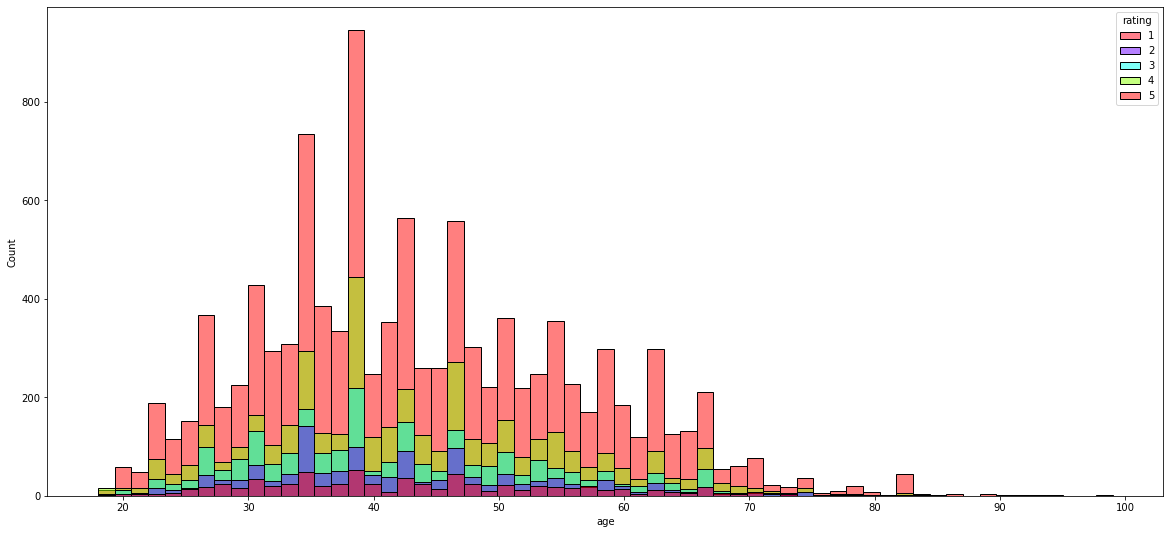

In [14]:
plt.figure(figsize=(20,9))
sns.histplot(x=df['age'], hue=df['rating'], palette='hsv_r')

# Most frequent product code

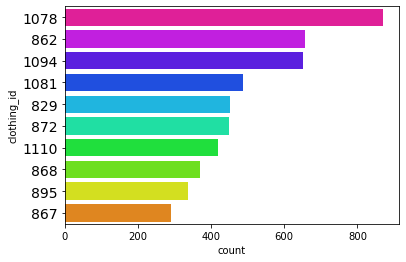

In [15]:
sns.countplot(y=df['clothing_id'], order=df['clothing_id'].value_counts().index[0:10],palette='hsv_r')
plt.yticks(fontsize=14)
plt.show()

# Rating vs Recommendation

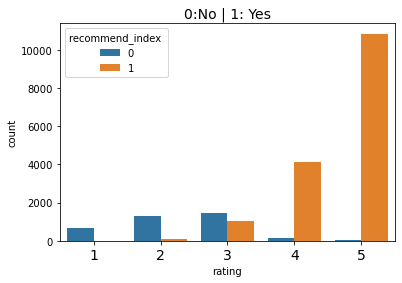

In [16]:
sns.countplot(x=df['rating'], hue=df['recommend_index '])
plt.title('0:No | 1: Yes', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

# Most recommended product

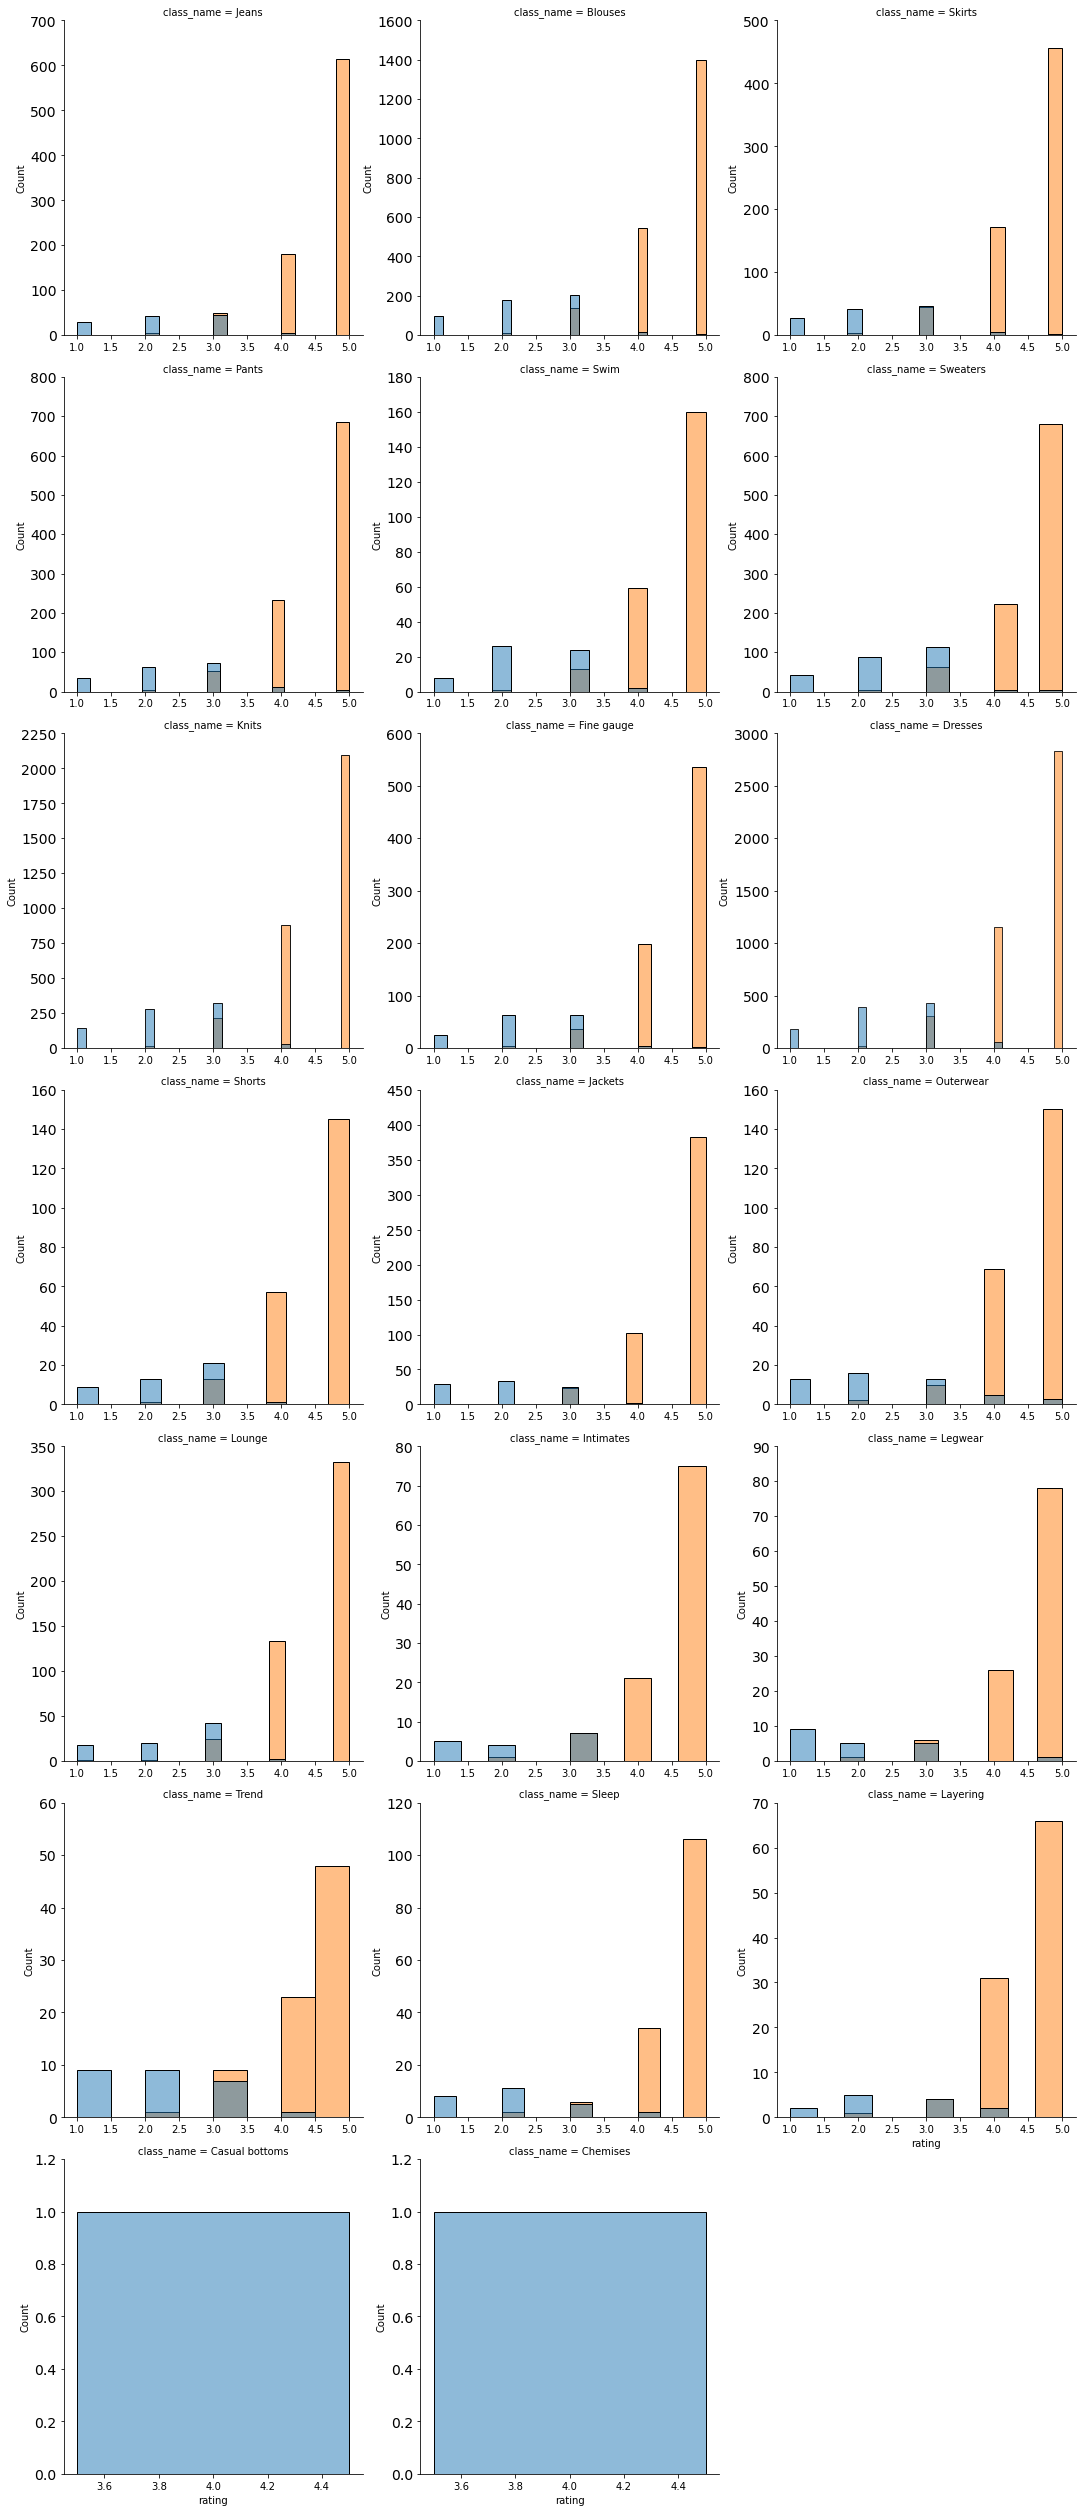

In [17]:
# color -> blue:No, beig:Yes
g = sns.FacetGrid(df, col='class_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='rating', hue='recommend_index ')
g.set_yticklabels(fontsize=14)

# Products sorted by age

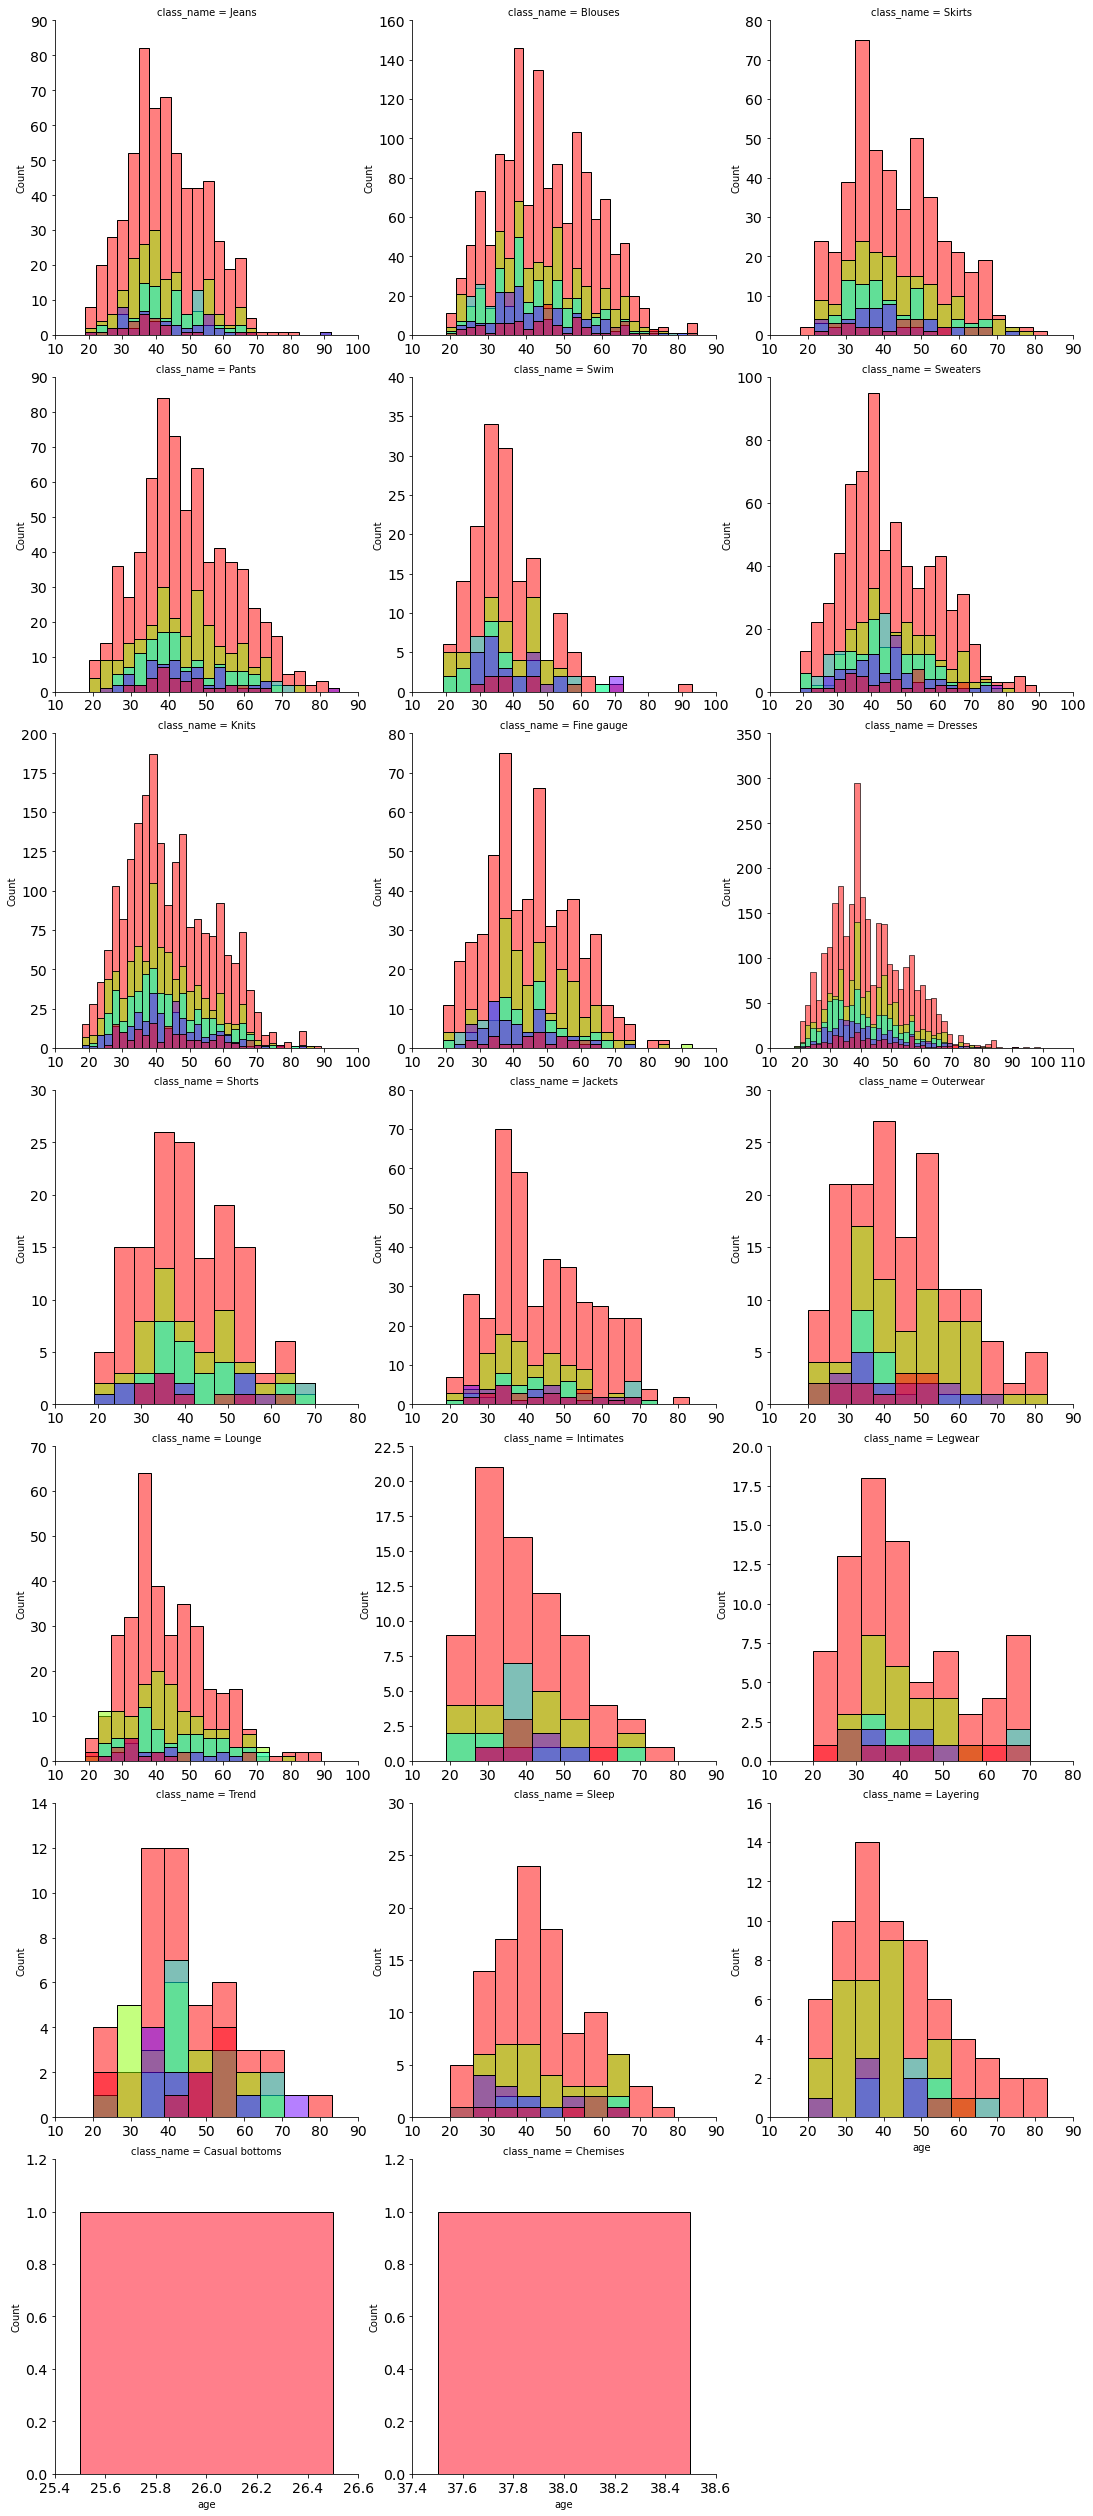

In [18]:
g = sns.FacetGrid(df, col='class_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating', palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

# Department sorted by age

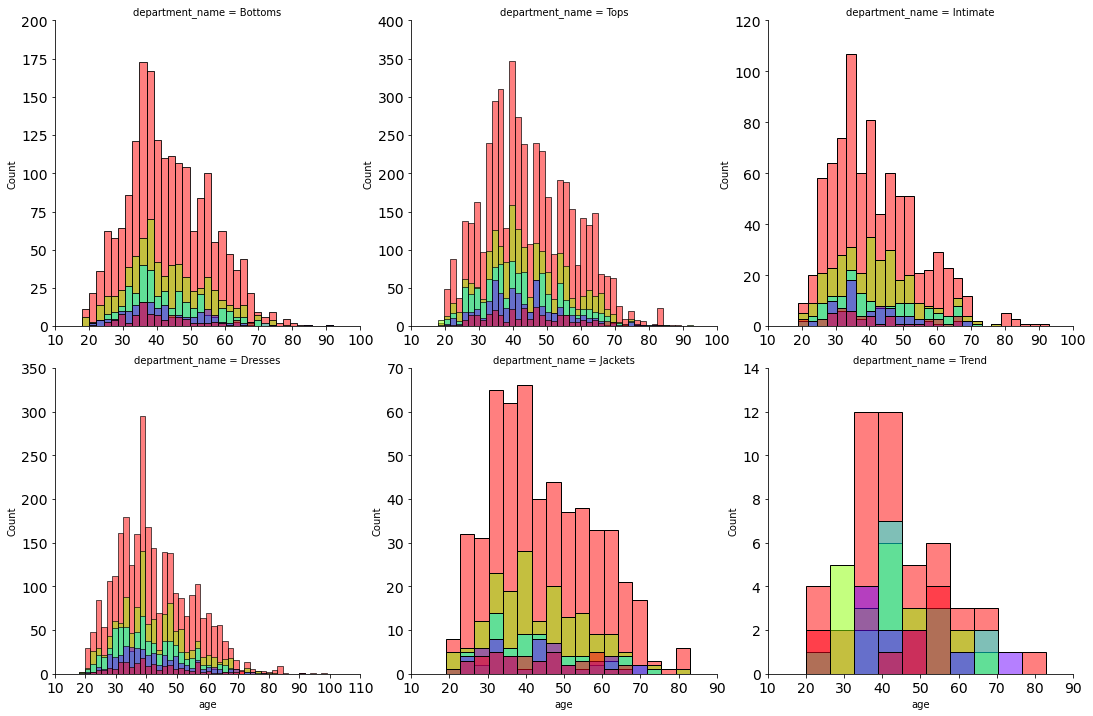

In [19]:
g = sns.FacetGrid(df, col='department_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating',palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

# Age-recommended departments

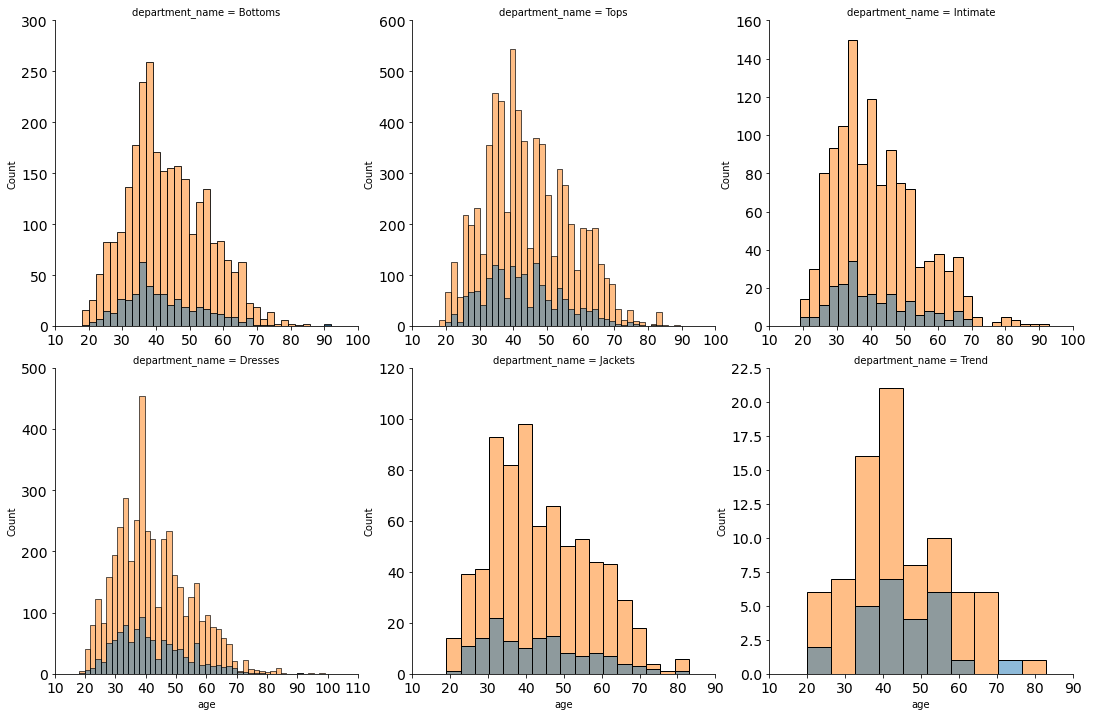

In [20]:
# color -> blue:No, beige:Yes
g = sns.FacetGrid(df, col='department_name', height=5, col_wrap=3, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='recommend_index ')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)
g.add_legend()

# Division sorted by age

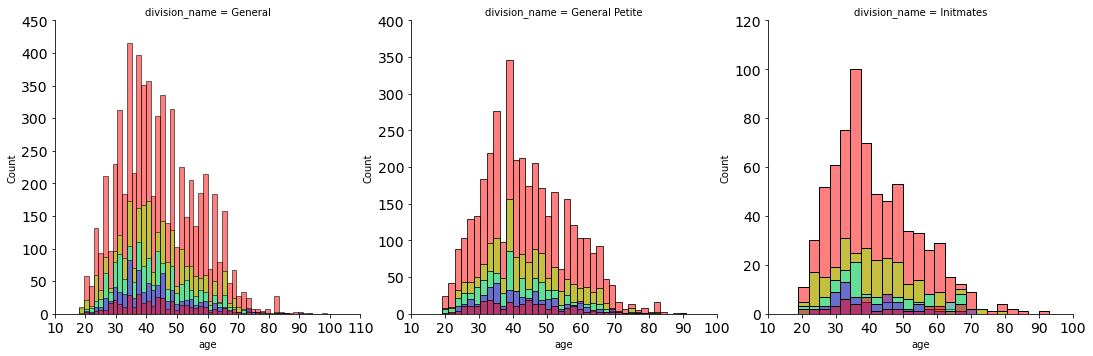

In [21]:
g = sns.FacetGrid(df, col='division_name', height=5,sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='rating',palette='hsv_r')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

# Recommended divison by age

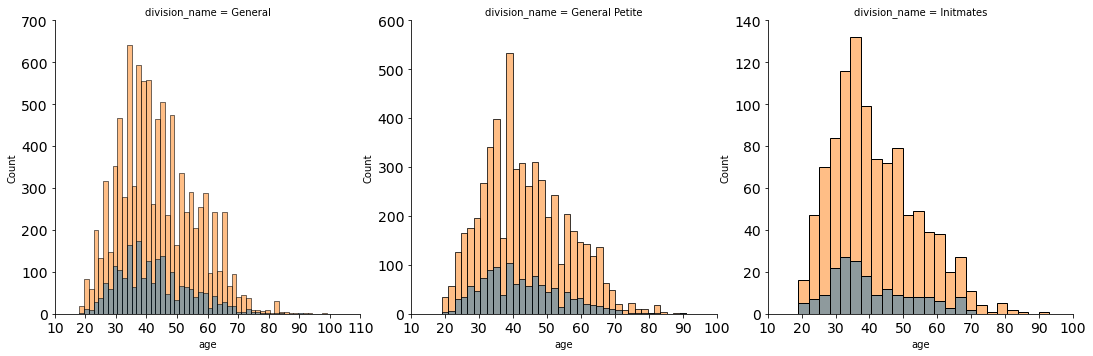

In [22]:
# color -> blue:No, beige:Yes
g = sns.FacetGrid(df, col='division_name', height=5, sharex=False,sharey=False)
g.map_dataframe(sns.histplot, x='age', hue='recommend_index ')
g.set_xticklabels(fontsize=14)
g.set_yticklabels(fontsize=14)

# word cloud

In [23]:
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [24]:
texto = df[['title', 'review_text']].copy()
texto.head()

,title,review_text
0,Amazing fit and wash,Like other reviewers i was hesitant to spend t...
1,Lovely and unique!,As is true of a bunch of the fall clothing pho...
2,Meh,"I so wanted this skirt to work, love the desig..."
3,Wow,Love love this! i was hesitant to buy this at ...
4,Great for bigger busts,I absolutely love the retro look of this swims...


In [25]:
def text_clear(text):
    text = text.lower()
    text = text.replace('!','')
    text = text.replace('?','')
    text = text.replace('.','')
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    
    return text
print('ok')

ok


In [26]:
texto['title'] = texto['title'].apply(lambda text: text_clear(text))
texto['review_text'] = texto['review_text'].apply(lambda text: text_clear(text))
print('ok')

ok


In [27]:
# word count and table function def
def text_freq(data):
    tipo = list(data)
    words = []
    
    for i in tipo:
        i = list(i.split())
        for j in i:
            words.append(j.replace(' ',''))
    contagem = Counter(words)
    tabela = pd.DataFrame({
        'Words':contagem.keys(),
        'Count':contagem.values()
    }).sort_values('Count',ascending=False)
    return tabela

# Frequency of word in the title

In [28]:
title = text_freq(texto['title']).head(20)
display(title)

,Words,Count
10,love,1768
7,great,1756
61,dress,1533
79,cute,1386
13,beautiful,1291
48,top,1097
31,perfect,797
88,pretty,582
1,fit,564
217,nice,488


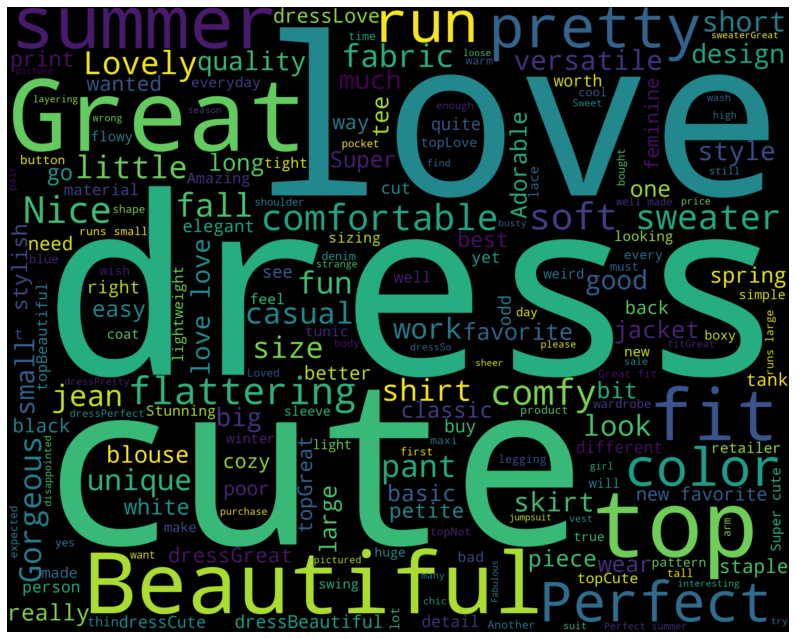

In [29]:
# word function and table function def
d = df['title']
text = ''.join(d)

wordcloud = WordCloud(stopwords=STOPWORDS,width=2500,
                      height=2000).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequency of words in the comments

In [30]:
comments = text_freq(texto['review_text']).head(20)
display(comments)

,Words,Count
356,dress,8660
69,love,7551
97,size,7167
0,like,6164
102,fit,6076
163,top,5902
158,wear,5594
103,great,4976
153,i'm,4927
16,would,4459


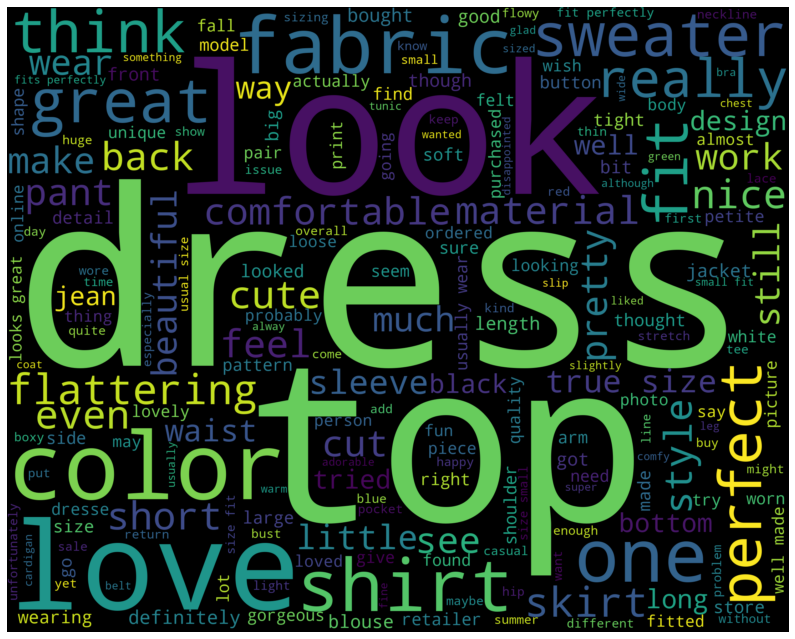

In [31]:
# word cloud
d = texto['review_text']
text = ''.join(d)

wordcloud = WordCloud(stopwords=STOPWORDS,width=2500,
                      height=2000).generate(text)

plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()